In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB

In [3]:
# Open and read the JSON file
import json
with open('TechOR.json', 'r') as file:
    data = json.load(file)

# Print the data from the file
print(data)

[{'Recipient': 'B', 'Donor': ['AB']}, {'Recipient': 'A', 'Donor': ['AB']}, {'Recipient': 'O', 'Donor': ['A', 'B']}, {'Recipient': 'A', 'Donor': ['AB']}, {'Recipient': 'B', 'Donor': ['A']}, {'Recipient': 'A', 'Donor': ['AB']}, {'Recipient': 'A', 'Donor': ['AB']}, {'Recipient': 'O', 'Donor': ['AB', 'B', 'A']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'A', 'Donor': ['B']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'O', 'Donor': ['AB', 'B', 'A']}, {'Recipient': 'B', 'Donor': ['AB']}, {'Recipient': 'A', 'Donor': ['AB']}, {'Recipient': 'O', 'Donor': ['AB', 'A', 'B']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'B', 'Donor': ['AB']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'B', 'Donor': ['AB']}, {'Recipient': 'O', 'Donor': ['AB', 'A', 'B']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'O', 'Donor': ['AB', 'B']}, {'Recipient': 'O', 'Donor': ['AB', 'A']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'B', 'Donor': [

In [5]:
# Create a graph
G = nx.DiGraph()

# Create nodes
counter = 0
for element in data:
    G.add_nodes_from([(counter, element)])
    counter += 1
    
donor_recipient_compatibility = {'O': ['O', 'A', 'B', 'AB'], 'A': ['A', 'AB'], 'B':['B', 'AB'], 'AB':['AB']}

# Create edges
for node in G.nodes:
    donors = G.nodes[node]['Donor']
    #print(donors)
    for donor in donors:
        for vertex in G.nodes:
            if node == vertex: continue
            recipient = G.nodes[vertex]['Recipient']
            if recipient not in donor_recipient_compatibility[donor]: continue
            G.add_edge(node, vertex)    
                
print('edges:', G.edges) 

edges: [(2, 1), (2, 3), (2, 5), (2, 6), (2, 8), (2, 9), (2, 13), (2, 23), (2, 33), (2, 35), (2, 42), (2, 47), (2, 77), (2, 81), (2, 86), (2, 87), (2, 93), (2, 94), (2, 96), (2, 100), (2, 103), (2, 105), (2, 106), (2, 108), (2, 114), (2, 122), (2, 125), (2, 126), (2, 131), (2, 137), (2, 139), (2, 140), (2, 142), (2, 143), (2, 144), (2, 148), (2, 150), (2, 151), (2, 160), (2, 161), (2, 162), (2, 167), (2, 168), (2, 170), (2, 173), (2, 174), (2, 176), (2, 185), (2, 187), (2, 195), (2, 196), (2, 198), (2, 200), (2, 202), (2, 213), (2, 218), (2, 232), (2, 234), (2, 236), (2, 238), (2, 241), (2, 245), (2, 247), (2, 249), (2, 251), (2, 253), (2, 261), (2, 264), (2, 273), (2, 278), (2, 280), (2, 286), (2, 287), (2, 291), (2, 292), (2, 295), (2, 302), (2, 303), (2, 304), (2, 308), (2, 309), (2, 316), (2, 318), (2, 321), (2, 322), (2, 325), (2, 328), (2, 336), (2, 337), (2, 343), (2, 351), (2, 353), (2, 354), (2, 364), (2, 366), (2, 367), (2, 368), (2, 369), (2, 370), (2, 371), (2, 372), (2, 383

In [7]:
# To find cycles of length 2

cycle_2 = []
cycle_count = 0

for (r,d) in G.edges:
    G.edges[(r,d)]["visited"] = False

for (r,d) in G.edges:
    if G.edges[(r,d)]["visited"] == True: continue
    if (d,r) in G.edges:
        cycle_2.append((r,d,r))
        G.edges[(d,r)]["visited"] = True
        cycle_count += 1

print("Total number of cycles:", cycle_count)
print("cycles of length 2:", cycle_2)

Total number of cycles: 33330
cycles of length 2: [(4, 8, 4), (4, 9, 4), (4, 23, 4), (4, 42, 4), (4, 47, 4), (4, 77, 4), (4, 81, 4), (4, 93, 4), (4, 94, 4), (4, 96, 4), (4, 103, 4), (4, 105, 4), (4, 106, 4), (4, 108, 4), (4, 122, 4), (4, 125, 4), (4, 137, 4), (4, 139, 4), (4, 140, 4), (4, 142, 4), (4, 143, 4), (4, 144, 4), (4, 148, 4), (4, 151, 4), (4, 161, 4), (4, 162, 4), (4, 167, 4), (4, 170, 4), (4, 173, 4), (4, 174, 4), (4, 176, 4), (4, 187, 4), (4, 195, 4), (4, 196, 4), (4, 198, 4), (4, 200, 4), (4, 202, 4), (4, 218, 4), (4, 234, 4), (4, 236, 4), (4, 238, 4), (4, 241, 4), (4, 245, 4), (4, 249, 4), (4, 251, 4), (4, 253, 4), (4, 261, 4), (4, 264, 4), (4, 273, 4), (4, 280, 4), (4, 286, 4), (4, 287, 4), (4, 291, 4), (4, 292, 4), (4, 295, 4), (4, 303, 4), (4, 304, 4), (4, 308, 4), (4, 316, 4), (4, 321, 4), (4, 322, 4), (4, 325, 4), (4, 328, 4), (4, 336, 4), (4, 337, 4), (4, 343, 4), (4, 351, 4), (4, 353, 4), (4, 364, 4), (4, 366, 4), (4, 367, 4), (4, 368, 4), (4, 369, 4), (4, 371, 4),

In [9]:
# To find cycles of length 3

potential_cycle_3 = []

Q = G.to_undirected()

for (a,b) in Q.edges:
    for k in nx.common_neighbors(Q, a, b):
        potential_cycle_3.append((a,b,k))      
        
cycle_3 = [] 

for (a,b,k) in potential_cycle_3:
    if (a,b) in G.edges and (b,k) in G.edges and (k,a) in G.edges:
        cycle_3.append((a,b,k,a))
    if (b,a) in G.edges and (a,k) in G.edges and (k,b) in G.edges: 
        cycle_3.append((b,a,k,b))

# To print cycles of length 3

if cycle_3:
    print("Cycles of length 3:")
    for cycle in cycle_3:
        print(cycle)
else:
    print("No cycles of length 3")

No cycles of length 3


In [11]:
# To find the maximum matching

# Create model object
m = gp.Model()

# Create variable for each edge
x = m.addVars(G.edges, vtype=GRB.BINARY)

# Objective function: maximize number of edges
m.setObjective(gp.quicksum(x[e] for e in G.edges), GRB.MAXIMIZE)

# Constraints
m.addConstrs(gp.quicksum(x[(a,b)] for a in G.neighbors(b) if (a,b) in G.edges) <= 1 for b in G.nodes)

m.addConstrs(gp.quicksum(x[(a,b)] for a in G.neighbors(b) if (a,b) in G.edges) == gp.quicksum(x[(b,a)] for a in G.neighbors(b) if (b,a) in G.edges) for b in G.nodes)

# Solve
m.optimize()

print("Number of successful matches:",m.objVal)


Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-13
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: Intel(R) Core(TM) Ultra 7 155H, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 22 logical processors, using up to 22 threads

Optimize a model with 1498 rows, 186179 columns and 319499 nonzeros
Model fingerprint: 0x0b14b0da
Variable types: 0 continuous, 186179 integer (186179 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 764 rows and 118785 columns
Presolve time: 0.50s
Presolved: 734 rows, 67394 columns, 134421 nonzeros
Variable types: 0 continuous, 67394 integer (67394 binary)

Root relaxation: objective 3.300000e+02, 1844 iterations, 0.09 seconds (0.19 work units)

    Nodes    |    Current Node    |  

In [13]:
print("Number of successful matches:",m.objVal)

# Counting the number of matches by blood type
blood_type_matches = {'A': 0, 'B': 0, 'AB': 0, 'O': 0}
if m.status == GRB.OPTIMAL:
    for (i, j) in x:
        if x[i, j].X > 0.5:
            recipient_blood_type = data[j]['Recipient']
            blood_type_matches[recipient_blood_type] += 1

# Print results
print("Number of matches by blood type:")
for blood_type, count in blood_type_matches.items():
    print(f"{blood_type}: {count}")

Number of successful matches: 330.0
Number of matches by blood type:
A: 165
B: 165
AB: 0
O: 0


KeyError: 'blood_type'

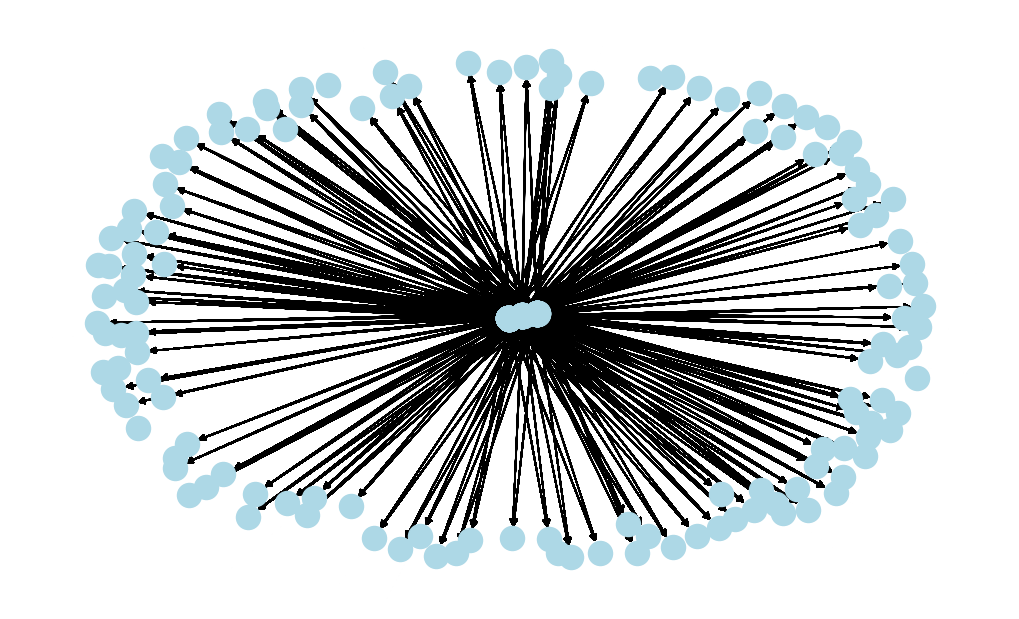

In [15]:
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 6))
nx.draw(G, pos, node_size=300, node_color='lightblue', with_labels=False, arrows=True)
nx.draw_networkx_labels(G, pos, {n: d['blood_type'] for n, d in G.nodes(data=True)}, font_size=8)
plt.title("Kidney Donation Matching Visualization")
plt.axis('off')
plt.show()